In [ ]:
# 1. Monter Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Installation des biblioth√®ques n√©cessaires**
Cette commande installe les biblioth√®ques Python indispensables pour notre projet :



*   **wfdb**: pour lire et manipuler les fichiers de donn√©es ECG

*  **neurokit2**: pour le traitement et l‚Äôanalyse des signaux physiologiques, notamment ECG.
*   **matplotlib** : pour tracer des graphiques et visualiser les donn√©es.


*   **numpy** : pour manipuler efficacement les tableaux et calculs num√©riques.

*   **scipy** : pour les fonctions scientifiques avanc√©es, notamment le traitement du signal.

Elle s‚Äôex√©cute dans l‚Äôenvironnement Python (notebook ou console) avec la commande pip (gestionnaire de paquets).

In [ ]:
!pip install wfdb neurokit2 matplotlib numpy scipy


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 91.2/91.2 kB 6.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 163.8/163.8 kB 11.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 708.4/708.4 kB 39.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12.4/12.4 MB 84.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pand

**Traitement et segmentation des signaux ECG √† partir de plusieurs bases de donn√©es**

Ce script permet de charger, segmenter, et fusionner deux datasets ECG (ECG-ID et PTB) pour pr√©parer des donn√©es d‚Äôentra√Ænement ou d‚Äôanalyse.




**D√©tail des √©tapes :**


1.   **D√©finition des param√®tres**


*  SEGMENT_DURATION : dur√©e d‚Äôun segment ECG en secondes (ici 5 secondes).
*  SAMPLE_RATE : fr√©quence d‚Äô√©chantillonnage des signaux ECG (1000 Hz).



2.   **Fonction segment_signal**


Cette fonction d√©coupe un signal ECG continu en segments de longueur fixe (5 secondes ici).
Chaque segment est une portion du signal qui sera utilis√©e individuellement pour l‚Äôanalyse ou l‚Äôentra√Ænement.



3.   **Fonction process_dataset**


*   Parcourt les dossiers d‚Äôun dataset donn√©, chaque dossier correspondant √† un patient.
*  Pour chaque patient, charge tous les enregistrements ECG (.dat).


*   Segmente chaque enregistrement en plusieurs segments de 5 secondes.
*  Associe √† chaque segment un label correspondant √† l‚ÄôID du patient.


*   G√®re les erreurs de lecture et affiche un rapport d‚Äôavancement.

4.   **Chargement des datasets ECG-ID et PTB**


*   On traite d‚Äôabord ECG-ID, en commen√ßant les IDs patients √† 0.


*  Ensuite, on traite PTB, en continuant les IDs √† partir de la fin d‚ÄôECG-ID pour √©viter les doublons.
*  On fusionne les segments et labels des deux datasets en une seule liste.



5.   **Conversion en arrays NumPy**

Pour faciliter les traitements ult√©rieurs (ex : entra√Ænement de mod√®les), on convertit les listes en arrays NumPy.


6.   **Sauvegarde**

Le dataset combin√© est sauvegard√© dans un fichier compress√© .npz pour un chargement rapide et pratique lors des prochaines utilisations.





In [ ]:
import os
import wfdb
import numpy as np
import matplotlib.pyplot as plt

# Param√®tres g√©n√©raux
SEGMENT_DURATION = 5  # secondes
SAMPLE_RATE = 1000    # Hz (adapter si n√©cessaire)

# Chemins datasets
path_ecg_id = "/content/drive/MyDrive/CAREDIFAY Stage/ecg-id-database-1.0.0"
path_ptb = "/content/drive/MyDrive/CAREDIFAY Stage/ptb-diagnostic-ecg-database-1.0.0/ptb-diagnostic-ecg-database-1.0.0"

def segment_signal(signal, segment_duration, fs):
    segment_length = segment_duration * fs
    segments = []
    for start in range(0, len(signal), segment_length):
        end = start + segment_length
        if end <= len(signal):
            segments.append(signal[start:end])
    return np.array(segments)

def process_dataset(dataset_path, starting_patient_id=0):
    all_segments = []
    all_labels = []
    patient_folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]
    print(f"Dataset {dataset_path} : {len(patient_folders)} patients trouv√©s")

    for i, patient_folder in enumerate(patient_folders):
        patient_id = starting_patient_id + i
        folder_path = os.path.join(dataset_path, patient_folder)

        records = [f.split('.')[0] for f in os.listdir(folder_path) if f.endswith('.dat')]
        records = list(set(records))

        print(f"Patient {patient_id} ({patient_folder}): {len(records)} enregistrements")

        for rec in records:
            record_path = os.path.join(folder_path, rec)
            try:
                record = wfdb.rdrecord(record_path)
                signal = record.p_signal[:, 0]  # Lead 0
                segments = segment_signal(signal, SEGMENT_DURATION, SAMPLE_RATE)
                all_segments.extend(segments)
                all_labels.extend([patient_id] * len(segments))
            except Exception as e:
                print(f"Erreur lecture {record_path} : {e}")
    return all_segments, all_labels, patient_id + 1

# Traiter d'abord ECG-ID dataset
segments_ecg_id, labels_ecg_id, next_patient_id = process_dataset(path_ecg_id, starting_patient_id=0)

# Puis traiter PTB dataset (les IDs commencent apr√®s ECG-ID)
segments_ptb, labels_ptb, _ = process_dataset(path_ptb, starting_patient_id=next_patient_id)

# Fusionner les deux datasets
all_segments = segments_ecg_id + segments_ptb
all_labels = labels_ecg_id + labels_ptb

print(f"Total segments combin√©s : {len(all_segments)}")
print(f"Total labels combin√©s : {len(all_labels)}")

# Convertir en numpy arrays pour la suite
all_segments_np = np.array(all_segments)
all_labels_np = np.array(all_labels)

print(f"Shape des segments : {all_segments_np.shape}")
print(f"Shape des labels : {all_labels_np.shape}")

# Sauvegarder pour usage futur
np.savez("combined_ecg_segments_labels.npz", segments=all_segments_np, labels=all_labels_np)


Dataset /content/drive/MyDrive/CAREDIFAY Stage/ecg-id-database-1.0.0 : 92 patients trouv√©s
Patient 0 (Person_87): 2 enregistrements
Patient 1 (Person_83): 2 enregistrements
Patient 2 (Person_89): 2 enregistrements
Patient 3 (Person_86): 2 enregistrements
Patient 4 (Person_88): 3 enregistrements
Patient 5 (Person_85): 3 enregistrements
Patient 6 (Person_90): 2 enregistrements
Patient 7 (Person_82): 2 enregistrements
Patient 8 (Person_84): 2 enregistrements
Patient 9 (Person_81): 2 enregistrements
Patient 10 (Person_71): 5 enregistrements
Patient 11 (Person_72): 8 enregistrements
Patient 12 (Person_79): 2 enregistrements
Patient 13 (Person_76): 3 enregistrements
Patient 14 (Person_75): 3 enregistrements
Patient 15 (Person_80): 2 enregistrements
Patient 16 (Person_74): 1 enregistrements
Patient 17 (Person_77): 3 enregistrements
Patient 18 (Person_78): 2 enregistrements
Patient 19 (Person_73): 2 enregistrements
Patient 20 (Person_66): 2 enregistrements
Patient 21 (Person_62): 3 enregistre

**Pr√©traitement des segments ECG**

Ce code r√©alise le nettoyage et la normalisation des segments ECG pour pr√©parer les donn√©es en vue d‚Äôun traitement par un mod√®le d‚Äôapprentissage automatique (par exemple un CNN 1D).

**√âtapes r√©alis√©es :**


1.   **Nettoyage du signal avec NeuroKit2**


*  La fonction nk.ecg_clean applique un filtrage passe-bande adapt√© au signal ECG afin d‚Äô√©liminer le bruit et les artefacts.
*   Cela permet d‚Äôobtenir un signal plus net et exploitable pour les analyses.


2.  **Normalisation**


*  Chaque segment est normalis√© pour que ses valeurs soient comprises entre 0 et 1.
*   Cela √©vite que l‚Äôamplitude absolue influence le mod√®le et facilite la convergence lors de l‚Äôentra√Ænement.


3.  **Structuration des donn√©es**


*   Les segments nettoy√©s sont convertis en un tableau NumPy pour une manipulation efficace.
*  Une dimension suppl√©mentaire est ajout√©e √† la fin (np.newaxis) pour repr√©senter le canal unique du signal, format attendu par les mod√®les CNN 1D.








In [ ]:
import neurokit2 as nk

def preprocess_segments(segments, sample_rate=1000):
    cleaned_segments = []
    for seg in segments:
        # Nettoyer le signal (filtrage passe-bande)
        cleaned = nk.ecg_clean(seg, sampling_rate=sample_rate)
        # Normaliser (centrer et r√©duire entre 0 et 1)
        cleaned = (cleaned - np.min(cleaned)) / (np.max(cleaned) - np.min(cleaned))
        cleaned_segments.append(cleaned)
    return np.array(cleaned_segments)

# Appliquer sur l‚Äôensemble des segments
cleaned_segments_np = preprocess_segments(all_segments_np, SAMPLE_RATE)

print("Shape apr√®s nettoyage :", cleaned_segments_np.shape)

# Ajouter la dimension canal (pour CNN 1D)
cleaned_segments_np = cleaned_segments_np[..., np.newaxis]
print("Shape finale (batch, longueur, canal) :", cleaned_segments_np.shape)


Shape apr√®s nettoyage : (10174, 5000)
Shape finale (batch, longueur, canal) : (10174, 5000, 1)


**Visualisation et statistiques des segments ECG bruts**

Ce bloc de code permet d'explorer visuellement et num√©riquement les segments ECG extraits avant tout pr√©traitement :


1.   **Affichage graphique**


*   Les trois premiers segments ECG sont trac√©s avec matplotlib pour observer directement la forme du signal brut.
*   Chaque graphique affiche √©galement le label (identifiant du patient) associ√© √† ce segment.


2.   **Statistiques simples**


*   Pour ces m√™mes segments, on calcule et affiche des statistiques basiques :

  *   Valeur minimale
  *   Valeur maximale

  *   Moyenne
*   Ces informations aident √† comprendre l‚Äô√©chelle et la variation des signaux ECG d‚Äôorigine, avant nettoyage ou normalisation.




Cette √©tape d‚Äôanalyse exploratoire est importante pour valider la qualit√© et la coh√©rence des donn√©es brutes avant de lancer les √©tapes d‚Äôentra√Ænement ou de traitement avanc√©.






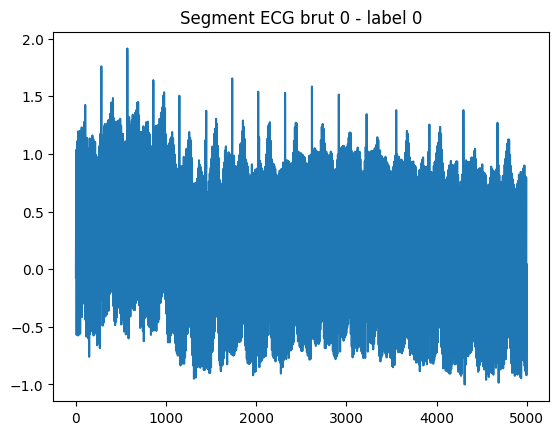

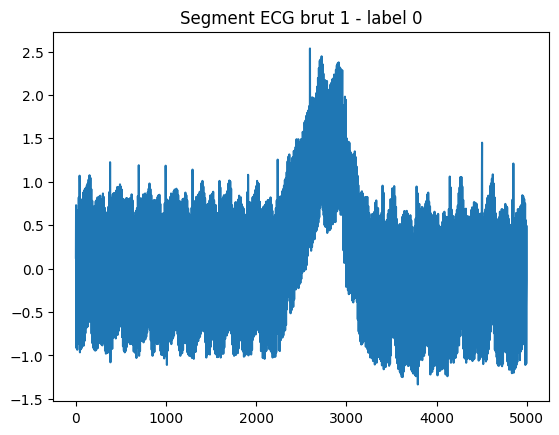

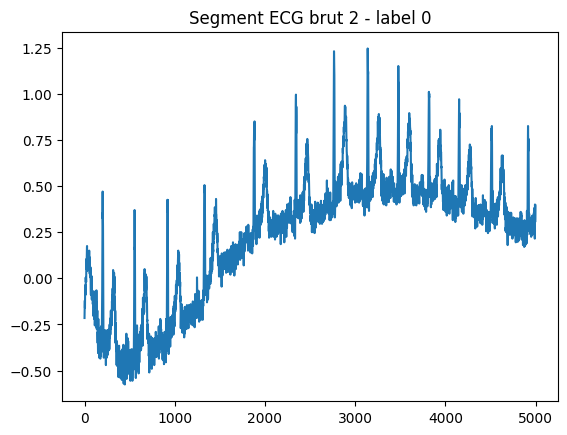

Segment 0 stats: min=-1.000, max=1.915, mean=0.200
Segment 1 stats: min=-1.335, max=2.535, mean=0.102
Segment 2 stats: min=-0.575, max=1.245, mean=0.230


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Affiche quelques segments ECG bruts
for i in range(3):
    plt.plot(all_segments_np[i])
    plt.title(f"Segment ECG brut {i} - label {all_labels_np[i]}")
    plt.show()

# V√©rifie les stats simples (min, max, mean) des premiers segments
for i in range(3):
    print(f"Segment {i} stats: min={np.min(all_segments_np[i]):.3f}, max={np.max(all_segments_np[i]):.3f}, mean={np.mean(all_segments_np[i]):.3f}")


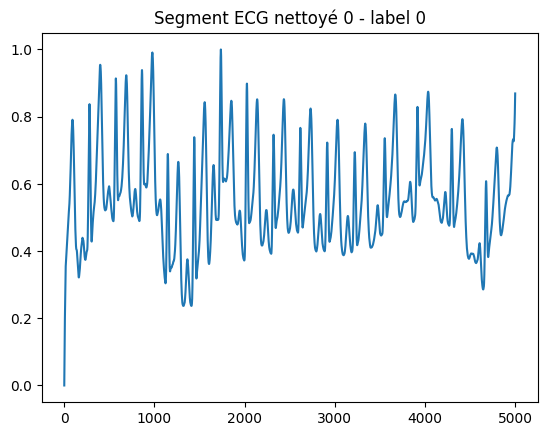

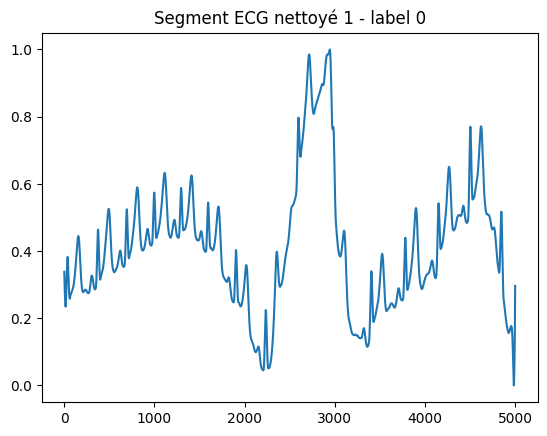

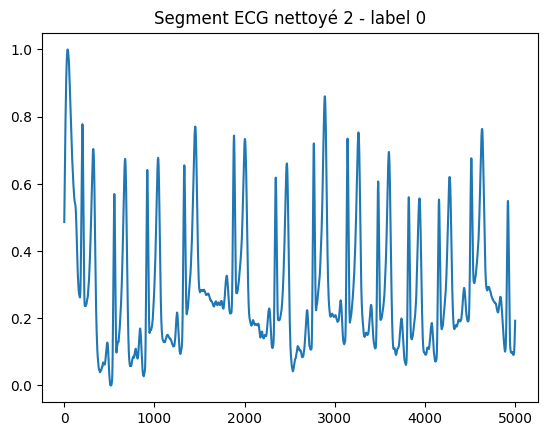

Segment nettoy√© 0 stats: min=0.000, max=1.000, mean=0.553
Segment nettoy√© 1 stats: min=0.000, max=1.000, mean=0.412
Segment nettoy√© 2 stats: min=0.000, max=1.000, mean=0.287


In [ ]:
for i in range(3):
    plt.plot(cleaned_segments_np[i].squeeze())
    plt.title(f"Segment ECG nettoy√© {i} - label {all_labels_np[i]}")
    plt.show()

for i in range(3):
    print(f"Segment nettoy√© {i} stats: min={np.min(cleaned_segments_np[i]):.3f}, max={np.max(cleaned_segments_np[i]):.3f}, mean={np.mean(cleaned_segments_np[i]):.3f}")


**Division des donn√©es en ensembles d'entra√Ænement et de test**

Ce bloc utilise la fonction train_test_split de scikit-learn pour s√©parer les donn√©es en deux parties :


*  **Ensemble d'entra√Ænement (80%) :**
Sert √† entra√Æner le mod√®le sur la majorit√© des segments ECG nettoy√©s.


*   **Ensemble de test (20%) :**
Permet d‚Äô√©valuer la performance du mod√®le sur des donn√©es qu‚Äôil n‚Äôa jamais vues.





In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cleaned_segments_np, all_labels_np, test_size=0.2, random_state=42, stratify=all_labels_np)

print(f"Train samples : {X_train.shape[0]}, Test samples : {X_test.shape[0]}")



Train samples : 8139, Test samples : 2035


**Construction d'un r√©seau de type Siamese simple pour l'ECG**


1.  **D√©finition du r√©seau de base** (base_network_simple) :


*   C‚Äôest un mod√®le convolutionnel 1D simple qui prend en entr√©e un segment ECG (forme (5000, 1)).
*  Il comprend deux couches Conv1D avec activation ReLU, chacune suivie d‚Äôun MaxPooling1D pour r√©duire la dimension temporelle.
*  Ensuite, une couche Flatten aplatit la sortie avant une couche dense finale √† 16 neurones, qui produit un vecteur d‚Äôembedding (repr√©sentation compacte du segment ECG).

2.   **Test rapide du mod√®le :**

*  On cr√©e un exemple al√©atoire de segment pour v√©rifier que le mod√®le g√©n√®re bien un embedding de taille 16.



3.  **Fonctions sp√©cifiques au r√©seau Siamese :**


*   contrastive_loss : fonction de perte qui encourage les embeddings des paires similaires √† √™tre proches, et ceux des paires diff√©rentes √† √™tre √©loign√©s par au moins une marge donn√©e.
*   euclidean_distance : calcule la distance euclidienne entre deux embeddings.
4.   **Construction du r√©seau Siamese complet :**


*   Deux entr√©es sont d√©finies (input_a et input_b), chacune repr√©sentant un segment ECG.

*  Chaque entr√©e passe par le m√™me r√©seau base_network_simple (partage des poids).
*  La distance entre les deux embeddings est calcul√©e avec Lambda(euclidean_distance).




5.   **Fonction de m√©trique compute_accuracy :**


*   Permet d‚Äô√©valuer la performance en d√©cidant que si la distance est inf√©rieure √† 0.5, les segments appartiennent √† la m√™me personne, sinon non.

*  Retourne la moyenne des pr√©dictions correctes.











In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Lambda, Dropout, BatchNormalization
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K
#input_shape = X_train.shape[1:]  # Par exemple (100, 1)
input_shape = (5000, 1)


def create_base_network_simple(input_shape):
    input = Input(shape=input_shape)
    x = Conv1D(16, 3, activation='relu')(input)
    x = MaxPooling1D(2)(x)
    x = Conv1D(32, 3, activation='relu')(x)
    x = MaxPooling1D(2)(x)
    x = Flatten()(x)
    x = Dense(16, activation='relu')(x)
    return Model(input, x)

base_network_simple = create_base_network_simple(input_shape)
base_network_simple.summary()

test_embedding = base_network_simple.predict(np.random.rand(1, input_shape[0], input_shape[1]))
print("Embedding simple test:", test_embedding)



def contrastive_loss(y_true, y_pred, margin=1):
    '''Fonction perte pour r√©seau Siamese'''
    square_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return K.mean(y_true * square_pred + (1 - y_true) * margin_square)

def euclidean_distance(vects):
    x, y = vects
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True) + K.epsilon())


input_shape = X_train.shape[1:]  # Exemple: (longueur_segment, 1)


input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)
processed_a = base_network_simple(input_a)
processed_b = base_network_simple(input_b)

distance = Lambda(euclidean_distance)([processed_a, processed_b])
def compute_accuracy(y_true, y_pred):
    '''M√©trique binaire : distance < 0.5 ‚Üí m√™me personne'''
    return K.mean(K.equal(y_true, K.cast(y_pred < 0.5, y_true.dtype)))

Model: "functional"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer (InputLayer)        ‚îÇ (None, 5000, 1)        ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d (Conv1D)                 ‚îÇ (None, 4998, 16)       ‚îÇ            64 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling1d (MaxPooling1D)    ‚îÇ (None, 2499, 16)       ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d_1 (Conv1D)               ‚îÇ (None, 2497, 32)       ‚îÇ         1,568 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling1d_1 (MaxPooling1D)  ‚îÇ (None, 1248, 32)       ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten (Flatten)               ‚îÇ (None, 39936)          ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                   ‚îÇ (None, 16)             ‚îÇ       638,992 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 640,624 (2.44 MB)

 Trainable params: 640,624 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2s/step
Embedding simple test: [[0.0000000e+00 5.8231406e-02 0.0000000e+00 2.0707925e-01 3.1269556e-01
  1.5420553e-01 6.6423342e-02 0.0000000e+00 3.6479571e-01 2.2502142e-01
  0.0000000e+00 4.2328659e-01 0.0000000e+00 0.0000000e+00 7.7709556e-05
  4.9370371e-02]]


**G√©n√©rateur personnalis√© de paires pour l'entra√Ænement d'un r√©seau Siamese ECG**

**Classe ECGPairGenerator :**
Cette classe h√©rite de tf.keras.utils.Sequence et g√©n√®re par lot (batch) des paires d‚Äô√©chantillons ECG pour entra√Æner un r√©seau Siamese.


1.    **Initialisation (__init__) :**

*   Prend en entr√©e les donn√©es X (segments ECG), les labels y, la taille de batch, et un indicateur de m√©lange (shuffle).
*   Cr√©e un dictionnaire label_to_indices pour retrouver rapidement les indices des segments appartenant √† chaque classe (patient).

*   Filtre les classes ne contenant pas au moins deux segments, car pour cr√©er des paires positives, il faut au moins deux √©chantillons.

2.   **Longueur du g√©n√©rateur (__len__) :**


*   D√©finit le nombre de lots par √©poque en fonction de la taille du dataset et la taille de batch.

3.   **R√©cup√©ration d‚Äôun lot (__getitem__) :**


*   Pour chaque batch, cr√©e deux tableaux pour contenir les deux ensembles de segments ECG (les deux entr√©es du r√©seau Siamese).

*   Pour chaque √©l√©ment du batch, choisit al√©atoirement si la paire est positive (m√™me personne) ou n√©gative (personnes diff√©rentes).
*   Si positive : choisit une classe valide, puis deux indices distincts appartenant √† cette classe.

*  Si n√©gative : choisit deux classes diff√©rentes et un indice al√©atoire dans chacune.
*   Remplit les tableaux avec les segments ECG correspondants et met √† jour les labels cibles (1 pour m√™me personne, 0 pour diff√©rente).

4.   **Fin d‚Äô√©poque (on_epoch_end) :**


*  Si shuffle est activ√©, m√©lange les donn√©es pour chaque nouvelle √©poque.
*  Met √† jour les indices des labels valides en fonction du nouvel ordre.








In [ ]:
class ECGPairGenerator(tf.keras.utils.Sequence):
    def __init__(self, X, y, batch_size=32, shuffle=True):
        self.X = X
        self.y = y
        self.batch_size = batch_size
        self.shuffle = shuffle

        self.labels_set = list(set(y))
        self.label_to_indices = {
            label: np.where(y == label)[0] for label in self.labels_set
        }

        # Filtrer les classes avec au moins 2 √©chantillons
        self.valid_labels = [label for label, idxs in self.label_to_indices.items() if len(idxs) >= 2]

    def __len__(self):
        return int(np.floor(len(self.X) / self.batch_size))

    def __getitem__(self, index):
        pairs = [np.zeros((self.batch_size, self.X.shape[1], self.X.shape[2])) for _ in range(2)]
        targets = np.zeros((self.batch_size, 1))

        for i in range(self.batch_size):
            if random.choice([True, False]):
                label = random.choice(self.valid_labels)  # üëà utiliser valid_labels ici
                idx1, idx2 = random.sample(list(self.label_to_indices[label]), 2)
                targets[i] = 1
            else:
                label1, label2 = random.sample(self.labels_set, 2)
                idx1 = random.choice(self.label_to_indices[label1])
                idx2 = random.choice(self.label_to_indices[label2])
                targets[i] = 0

            pairs[0][i, :, :] = self.X[idx1]
            pairs[1][i, :, :] = self.X[idx2]

        return (pairs[0], pairs[1]), targets

    def on_epoch_end(self):
        if self.shuffle:
            indices = np.arange(len(self.X))
            np.random.shuffle(indices)
            self.X = self.X[indices]
            self.y = self.y[indices]
            self.label_to_indices = {
                label: np.where(self.y == label)[0] for label in self.labels_set
            }
            self.valid_labels = [label for label, idxs in self.label_to_indices.items() if len(idxs) >= 2]


**Cr√©ation des g√©n√©rateurs de donn√©es pour l'entra√Ænement et la validation**


*   **train_gen :** Ce g√©n√©rateur cr√©e des lots (batchs) de paires d'√©chantillons ECG √† partir des donn√©es d'entra√Ænement X_train et des labels y_train. Chaque batch contient 32 paires. Il est utilis√© pour alimenter le mod√®le pendant la phase d'entra√Ænement.
*   **val_gen :** Ce g√©n√©rateur fonctionne de la m√™me mani√®re que train_gen, mais il utilise les donn√©es de test X_test et les labels y_test. Il est utilis√© pour √©valuer la performance du mod√®le sur des donn√©es qu'il n'a pas vues pendant l'entra√Ænement.

Ces g√©n√©rateurs facilitent la cr√©ation dynamique des paires positives et n√©gatives n√©cessaires pour entra√Æner un r√©seau Siamese, tout en g√©rant efficacement la m√©moire gr√¢ce au traitement par lots.



In [ ]:
train_gen = ECGPairGenerator(X_train, y_train, batch_size=32)
val_gen = ECGPairGenerator(X_test, y_test, batch_size=32)


**Cr√©ation et entra√Ænement du mod√®le Siamese**


*   **D√©finition des entr√©es :** Le mod√®le prend deux entr√©es input_a et input_b, chacune repr√©sentant un segment ECG avec la forme d√©finie par input_shape (par exemple, 5000 points avec 1 canal).

*   **Extraction des embeddings :** Chaque entr√©e est pass√©e dans le m√™me r√©seau de base (base_network_simple) pour extraire un vecteur d'embedding (repr√©sentation compacte).

*   **Calcul de la distance :** La distance euclidienne entre les deux embeddings est calcul√©e via une couche Lambda. Cette distance repr√©sente la similarit√© entre les deux segments ECG.
*  **Compilation du mod√®le :** Le mod√®le est compil√© avec une fonction de perte contrastive adapt√©e aux r√©seaux Siamese, un optimiseur Adam, et une m√©trique personnalis√©e compute_accuracy qui mesure la pr√©cision selon un seuil sur la distance.

*  **Entra√Ænement :** Le mod√®le est entra√Æn√© avec les g√©n√©rateurs train_gen et val_gen pendant 50 √©poques. Cela signifie que le r√©seau apprend √† distinguer si deux segments ECG appartiennent √† la m√™me personne ou non, en utilisant des paires positives et n√©gatives fournies par les g√©n√©rateurs.

Ce processus permet de construire un syst√®me de reconnaissance bas√© sur les caract√©ristiques ECG, capable de comparer efficacement deux signaux.



In [ ]:
import random
input_shape = X_train.shape[1:]  # (longueur_segment, 1)

input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

processed_a = base_network_simple(input_a)
processed_b = base_network_simple(input_b)

distance = Lambda(euclidean_distance)([processed_a, processed_b])

model = Model([input_a, input_b], distance)
model.compile(loss=contrastive_loss, optimizer='adam', metrics=[compute_accuracy])

history = model.fit(train_gen, validation_data=val_gen, epochs=50)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
254/254 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14s 43ms/step - compute_accuracy: 0.6713 - loss: 0.2715 - val_compute_accuracy: 0.7004 - val_loss: 0.2288
Epoch 2/50
254/254 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 38ms/step - compute_accuracy: 0.6899 - loss: 0.2301 - val_compute_accuracy: 0.7009 - val_loss: 0.2126
Epoch 3/50
254/254 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 38ms/step - compute_accuracy: 0.7010 - loss: 0.2231 - val_compute_accuracy: 0.7202 - val_loss: 0.2168
Epoch 4/50
254/254 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 38ms/step - compute_accuracy: 0.7068 - loss: 0.2231 - val_compute_accuracy: 0.6964 - val_loss: 0.2172
Epoch 5/50
254/254 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 38ms/step - compute_accuracy: 0.7085 - loss: 0.2201 - val_compute_accuracy: 0.7282 - val_loss: 0.2235
Epoch 6/50
254/254 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [ ]:
# Sauvegarde du mod√®le Siamese complet
#model.save("siamese_model.h5")

# Sauvegarde du r√©seau de base (celui qui produit l'embedding)
base_network_simple.save("base_network_simple.h5")




*   Cette ligne sauvegarde **le mod√®le de r√©seau de base simple** (qui extrait les embeddings des segments ECG) dans un fichier .h5 au chemin indiqu√©.

*   Ce mod√®le est uniquement la partie du r√©seau qui transforme un segment ECG en un vecteur de caract√©ristiques (embedding).

* Cette sauvegarde permet de r√©utiliser ce mod√®le plus tard, sans avoir √† le reconstruire ou √† le r√©entra√Æner.
*   √âl√©ment de liste


*   Ici, on ne sauvegarde pas le mod√®le complet Siamese (qui compare deux segments), mais juste le r√©seau qui produit les embeddings.


*   Cela facilite par exemple l‚Äôextraction d‚Äôembeddings pour de nouvelles donn√©es.



**Tableau comparatif : Mod√®le de base simple vs Mod√®le Siamese**

| Aspect                  | Mod√®le Base Simple (`base_network_simple`)                   | Mod√®le Siamese (r√©seau complet)                                                              |
| ----------------------- | ------------------------------------------------------------ | -------------------------------------------------------------------------------------------- |
| **Fonction**            | Extrait un vecteur d'embedding √† partir d'un segment ECG     | Compare deux embeddings pour estimer si deux segments appartiennent √† la m√™me personne       |
| **Entr√©es**             | Un segment ECG                                               | Deux segments ECG (deux entr√©es distinctes)                                                  |
| **Sortie**              | Un vecteur de caract√©ristiques (embedding)                   | Une distance entre deux embeddings (indiquant similarit√©)                                    |
| **Utilisation typique** | Extraction d‚Äôembeddings pour stockage ou classification      | Apprentissage de la similarit√©/diff√©rence entre paires                                       |
| **Sauvegarde**          | Sauvegard√© seul dans un fichier `.h5`                        | Mod√®le complet sauvegard√©, n√©cessite souvent des fonctions personnalis√©es (loss, distance)   |
| **Chargement**          | Simple, sans besoin de fonctions personnalis√©es              | N√©cessite souvent `custom_objects` pour fonctions personnalis√©es (ex : `euclidean_distance`) |
| **Entra√Ænement**        | Parfois utilis√© pour pr√©-entrainer l‚Äôextracteur d‚Äôembeddings | Entra√Æn√© avec paires de donn√©es et fonction perte contrastive                                |
| **Complexit√©**          | Moins complexe, plus facile √† manipuler                      | Plus complexe, impl√©mentation et gestion plus technique                                      |


**Pourquoi cr√©er un mod√®le Siamese si on utilise finalement seulement le mod√®le de base (base_network_simple) ?**


1.  **R√¥le du mod√®le Siamese:**
Le mod√®le Siamese est con√ßu pour apprendre √† comparer deux entr√©es (ici, deux segments ECG) et d√©terminer s‚Äôils appartiennent √† la m√™me personne ou non.
Pour cela, il utilise deux fois le mod√®le de base (le m√™me r√©seau partag√©) pour extraire les embeddings, puis calcule une distance entre ces embeddings.

2.   **Pourquoi cr√©er le mod√®le Siamese ?:**


*  **Pour l‚Äôentra√Ænement** : Le r√©seau Siamese s‚Äôentra√Æne avec des paires d‚Äô√©chantillons et une fonction de perte adapt√©e (ex : perte contrastive) pour apprendre √† bien s√©parer les embeddings des diff√©rentes personnes.
*   C‚Äôest donc pendant l‚Äôentra√Ænement qu‚Äôon a besoin du mod√®le Siamese complet.



3.   **Pourquoi n‚Äôutiliser que le mod√®le de base ensuite ?:**


*   Une fois que le mod√®le Siamese est entra√Æn√©, la partie essentielle pour l‚Äôinf√©rence est uniquement le **mod√®le de base**, car c‚Äôest lui qui calcule les embeddings.

*   Pour authentifier une nouvelle donn√©e, on n‚Äôa plus besoin de comparer deux segments simultan√©ment avec le mod√®le Siamese complet, on extrait simplement l‚Äôembedding du segment avec le mod√®le de base, puis on compare cet embedding aux embeddings de r√©f√©rence (ex : par calcul de distance euclidienne).
*   Cela simplifie √©norm√©ment l‚Äôutilisation, car tu manipules un seul segment √† la fois et fais la comparaison √† part (hors du mod√®le).

| √âtape                      | Utilisation                            | Pourquoi ?                                                               |
| -------------------------- | -------------------------------------- | ------------------------------------------------------------------------ |
| **Entra√Ænement**           | Mod√®le Siamese complet                 | Apprendre la fonction de similarit√© entre paires d‚ÄôECG                   |
| **Extraction & Inf√©rence** | Mod√®le de base (`base_network_simple`) | Extraire les embeddings d‚Äôun segment individuel pour comparaison externe |








In [ ]:
base_network_simple.save("/content/drive/MyDrive/CAREDIFAY Stage/base_network_simple.h5")


In [ ]:
!pip install deepface


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 87.2/87.2 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 127.7/127.7 kB 12.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 95.2/95.2 kB 10.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 85.0/85.0 kB 10.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.9/1.9 MB 53.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 288.9/288.9 kB 26.1 MB/s eta 0:00:00
  

In [ ]:
import os
import cv2
import numpy as np
import neurokit2 as nk
import wfdb
from deepface import DeepFace
from tensorflow.keras.models import load_model
from scipy.spatial.distance import cosine
from tqdm import tqdm

25-08-03 20:31:58 - Directory /root/.deepface has been created
25-08-03 20:31:58 - Directory /root/.deepface/weights has been created


In [ ]:
# --- Param√®tres globaux ---
SAMPLE_RATE = 1000
FACE_THRESHOLD = 0.4
ECG_THRESHOLD = 0.2

#BASE_FOLDER = "utilisateurs"  # dossier racine pour tous les utilisateurs
BASE_FOLDER = "/content/drive/MyDrive/CAREDIFAY Stage/utilisateurs"  # dossier racine pour tous les utilisateurs
MODEL_PATH = "base_network_simple.h5"  # mod√®le tensorflow pour ECG

In [ ]:
import os
os.makedirs(BASE_FOLDER, exist_ok=True)


**Fonctions d‚Äôaugmentation d‚Äôimages:**

Ce bloc contient deux fonctions qui permettent d‚Äôaugmenter artificiellement les donn√©es d‚Äôimages utilisateur en cr√©ant des versions tourn√©es (rotated) des images originales. Cette technique d‚Äôaugmentation de donn√©es est importante pour am√©liorer la robustesse du mod√®le en augmentant la diversit√© des images d‚Äôentra√Ænement.


*   rotate_image(image, angle) :
Cette fonction prend en entr√©e une image et un angle (en degr√©s), et retourne une nouvelle image qui est la version de l‚Äôoriginale pivot√©e autour de son centre selon cet angle.
   *   Utilisation de cv2.getRotationMatrix2D pour calculer la matrice de transformation de rotation.
   *   cv2.warpAffine applique cette transformation √† l‚Äôimage en conservant la taille originale.


*  augment_user_images(user_images_folder, rotation_step=25) :
Cette fonction r√©alise l‚Äôaugmentation des images dans un dossier utilisateur donn√© :

  *   Elle liste toutes les images avec extensions .jpg, .jpeg ou .png.
  *   Pour chaque image, elle g√©n√®re des images tourn√©es par incr√©ments de rotation_step degr√©s (par d√©faut 25¬∞), jusqu‚Äô√† 100¬∞.

  *   Chaque nouvelle image est sauvegard√©e dans le m√™me dossier avec un suffixe indiquant l‚Äôangle de rotation (ex: photo_rot25.jpg).
  *  Avant de sauvegarder, elle v√©rifie que l‚Äôimage n‚Äôexiste pas d√©j√† pour √©viter les doublons.

Cette m√©thode permet d‚Äôenrichir le jeu de donn√©es visuelles, ce qui peut am√©liorer la performance et la g√©n√©ralisation des mod√®les de reconnaissance faciale ou autres mod√®les bas√©s sur l‚Äôimage.









In [ ]:
# --- Fonctions d'augmentation d'images ---
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, matrix, (w, h), borderMode=cv2.BORDER_REPLICATE)

def augment_user_images(user_images_folder, rotation_step=25):
    image_files = [f for f in os.listdir(user_images_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    for img_file in tqdm(image_files, desc=f"Augmentation images {user_images_folder}"):
        img_path = os.path.join(user_images_folder, img_file)
        img = cv2.imread(img_path)
        if img is None:
            continue
        base_name, ext = os.path.splitext(img_file)
        for angle in range(rotation_step, 101, rotation_step):
            new_filename = f"{base_name}_rot{angle}{ext}"
            new_path = os.path.join(user_images_folder, new_filename)
            if not os.path.exists(new_path):
                rotated_img = rotate_image(img, angle)
                cv2.imwrite(new_path, rotated_img)


**Pr√©traitement des segments ECG:**
Ce bloc d√©finit deux fonctions essentielles pour pr√©parer les signaux ECG bruts avant leur passage dans le mod√®le d‚Äôapprentissage.


*   preprocess_ecg_segment(segment) :

Cette fonction prend un segment brut de signal ECG en entr√©e et effectue les op√©rations suivantes :


1. **Nettoyage du signal :** avec la fonction nk.ecg_clean de la biblioth√®que NeuroKit2, qui applique un filtrage passe-bande adapt√© au signal ECG afin d‚Äô√©liminer le bruit et les artefacts.

1.   **Normalisation :** le signal nettoy√© est normalis√© pour √™tre compris entre 0 et 1, facilitant ainsi l‚Äôapprentissage du mod√®le en standardisant l‚Äô√©chelle des donn√©es.
2.  **Reshape :** le segment est remis en forme pour correspondre √† la dimension attendue par le mod√®le, ici (1, longueur_segment, 1).



*  segment_signal(signal, segment_length=5000) :
Cette fonction d√©coupe un signal ECG complet en segments plus petits de longueur fixe (par d√©faut 5000 √©chantillons).

   *   Elle d√©coupe le signal en tranches cons√©cutives non chevauchantes.
   *   Cela permet de traiter et d‚Äôanalyser localement des portions du signal ECG, ce qui est utile pour entra√Æner des mod√®les sur des s√©quences de taille g√©rable.


   Ces √©tapes de pr√©traitement sont cruciales pour garantir la qualit√© des donn√©es d‚Äôentr√©e et am√©liorer les performances de l‚Äôalgorithme de reconnaissance bas√© sur les signaux ECG.





In [ ]:
# --- Pr√©traitement ECG ---
def preprocess_ecg_segment(segment):
    cleaned = nk.ecg_clean(segment, sampling_rate=SAMPLE_RATE)
    normed = (cleaned - np.min(cleaned)) / (np.max(cleaned) - np.min(cleaned))
    return normed.reshape(1, -1, 1)

def segment_signal(signal, segment_length=5000):
    segments = []
    for start in range(0, len(signal) - segment_length + 1, segment_length):
        segments.append(signal[start:start + segment_length])
    return np.array(segments)

**Extraction des embeddings ECG:**

Cette fonction extract_ecg_embeddings permet d‚Äôextraire des repr√©sentations num√©riques (embeddings) √† partir d‚Äôun fichier ECG .dat, en utilisant un mod√®le TensorFlow pr√©-entra√Æn√©.


*   **Chargement du signal ECG :**
Le chemin du fichier .dat est transform√© pour charger le signal avec la biblioth√®que wfdb.
Seul le premier canal (record.p_signal[:, 0]) est utilis√© ici, car il contient la mesure ECG principale.

*  **Segmentation du signal :**
Le signal ECG complet est d√©coup√© en segments de taille fixe via la fonction segment_signal.
Cela permet d‚Äôextraire des caract√©ristiques locales sur des portions courtes du signal.

*  **Pr√©traitement de chaque segment :**
Chaque segment est nettoy√© et normalis√© via la fonction preprocess_ecg_segment pour √™tre pr√™t √† l‚Äôentr√©e du mod√®le.
*   Extraction des embeddings :
Les segments pr√©trait√©s sont pass√©s dans le mod√®le TensorFlow (par exemple un r√©seau convolutif), qui g√©n√®re des vecteurs num√©riques (embeddings) r√©sumant les caract√©ristiques importantes de chaque segment.

*   **Retour :**
La fonction retourne √† la fois :

  *   Les embeddings calcul√©s pour chaque segment (sous forme de tableau NumPy).
  *  Le signal ECG brut complet, pour d‚Äô√©ventuelles analyses ou visualisations ult√©rieures.







In [ ]:
# --- Extraction embeddings ECG ---
def extract_ecg_embeddings(dat_file_path, model):
    base_path = dat_file_path.replace(".dat", "")
    record = wfdb.rdrecord(base_path)
    signal = record.p_signal[:, 0]  # 1er canal ECG

    segments = segment_signal(signal)
    processed = np.array([preprocess_ecg_segment(seg).squeeze() for seg in segments])
    processed = processed.reshape(len(segments), -1, 1)

    embeddings = model.predict(processed)
    return embeddings, signal

**Extraction des embeddings faciaux :**

Cette fonction extract_face_embeddings permet d‚Äôextraire des repr√©sentations num√©riques (embeddings) √† partir d‚Äôun dossier d‚Äôimages faciales, en utilisant la biblioth√®que **DeepFace** avec le mod√®le **Facenet**.


*   **Parcours du dossier d‚Äôimages :**
La fonction r√©cup√®re la liste des fichiers images (formats .jpg, .jpeg, .png) pr√©sents dans le dossier sp√©cifi√©.

*   **Extraction des embeddings pour chaque image :**
Pour chaque image :
  *  La fonction utilise DeepFace.represent pour g√©n√©rer un vecteur d‚Äôembedding qui capture les caract√©ristiques uniques du visage sur l‚Äôimage.

  *   L‚Äôoption enforce_detection=False permet de contourner l‚Äôerreur si aucun visage n‚Äôest d√©tect√©, utile quand la qualit√© est variable.
  *  L‚Äôembedding est ajout√© √† la liste.


*  **Gestion des erreurs :**
Si une image pose probl√®me (ex : visage non d√©tect√© ou image corrompue), une erreur est affich√©e mais le processus continue.


*   **Retour :**
La fonction retourne un tableau NumPy contenant tous les embeddings extraits, pr√™t √† √™tre utilis√© pour la reconnaissance faciale ou la comparaison.






In [ ]:
# --- Extraction embeddings visage ---
def extract_face_embeddings(images_folder):
    embeddings = []
    image_files = [f for f in os.listdir(images_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    for img_file in image_files:
        img_path = os.path.join(images_folder, img_file)
        try:
            rep = DeepFace.represent(img_path=img_path, model_name="Facenet", enforce_detection=False)[0]
            embeddings.append(rep["embedding"])
        except Exception as e:
            print(f"[‚ö†Ô∏è] Erreur extraction visage sur {img_path} : {e}")

    return np.array(embeddings)


**Cr√©ation du dossier utilisateur et sauvegarde des donn√©es:**

Ce bloc de code g√®re l'organisation et la sauvegarde structur√©e des donn√©es utilisateur (images, embeddings faciaux et ECG, signal brut ECG) dans des dossiers sp√©cifiques.


1.   create_user_folder(username):


*   Cr√©e un dossier principal pour chaque utilisateur (BASE_FOLDER/username) avec un sous-dossier images/ pour stocker ses images faciales.
*  Le dossier est cr√©√© s‚Äôil n‚Äôexiste pas d√©j√†.



2.  save_face_embeddings(embeddings, user_folder):


*   Sauvegarde les embeddings faciaux dans un fichier face_embeddings.npy √† l‚Äôint√©rieur du dossier utilisateur.




3.   save_ecg_embeddings(embeddings, user_folder):


*   Sauvegarde les embeddings ECG dans un fichier ecg_embeddings.npy.


4.   save_ecg_raw(signal, user_folder):

*   Sauvegarde le signal ECG brut (non transform√©) dans un fichier ecg_raw.npy.

5.  save_user_images(source_images_paths, images_folder):



*   Enregistre une copie des images faciales sources de l‚Äôutilisateur dans son dossier images/, renomm√©es sous le format img1.jpg, img2.jpg, etc.
*  Cela permet d‚Äôavoir une trace des images utilis√©es pour les embeddings.





In [ ]:
# --- Cr√©ation dossier utilisateur + sauvegarde ---
def create_user_folder(username):
    user_folder = os.path.join(BASE_FOLDER, username)
    images_folder = os.path.join(user_folder, "images")
    os.makedirs(images_folder, exist_ok=True)
    return user_folder, images_folder


def save_face_embeddings(embeddings, user_folder):
    np.save(os.path.join(user_folder, "face_embeddings.npy"), embeddings)


def save_ecg_embeddings(embeddings, user_folder):
    np.save(os.path.join(user_folder, "ecg_embeddings.npy"), embeddings)


def save_ecg_raw(signal, user_folder):
    np.save(os.path.join(user_folder, "ecg_raw.npy"), signal)


def save_user_images(source_images_paths, images_folder):
    for i, img_path in enumerate(source_images_paths):
        img = cv2.imread(img_path)
        if img is not None:
            cv2.imwrite(os.path.join(images_folder, f"img{i+1}.jpg"), img)


**Fonction d‚Äôinscription utilisateur:**

Cette fonction permet d‚Äôenregistrer un nouvel utilisateur dans le syst√®me en sauvegardant √† la fois les donn√©es faciales et les donn√©es ECG, ainsi que leurs repr√©sentations vectorielles (embeddings), dans un dossier structur√©.

**√âtapes ex√©cut√©es :**


1.   **Cr√©ation d‚Äôun dossier d√©di√© √† l‚Äôutilisateur:**



*   üìÅ BASE_FOLDER/username/ avec sous-dossier images/

2.   **Sauvegarde des images d‚Äôentr√©e:**


*   Les images brutes sont copi√©es dans le dossier utilisateur pour r√©f√©rence.




3.   **Augmentation des images**




*   Une augmentation par rotation est appliqu√©e aux images pour enrichir les donn√©es (meilleure robustesse du mod√®le facial).







4.   **Extraction des embeddings faciaux**


*   Utilise le mod√®le pr√©-entra√Æn√© Facenet via la librairie DeepFace.
*   Les embeddings sont sauvegard√©s dans face_embeddings.npy



5.  **Extraction des embeddings ECG**


*  Lecture du fichier .dat ECG via wfdb.
*   Le signal est d√©coup√©, pr√©trait√© (nettoyage + normalisation), puis pass√© dans un mod√®le  CNN (model_ecg) pour g√©n√©rer les embeddings ECG.
*   Ces repr√©sentations sont sauvegard√©es dans ecg_embeddings.npy, et le signal brut est sauvegard√© dans ecg_raw.npy


 **Objectif :**
Constituer un profil biom√©trique complet de l‚Äôutilisateur (visage + ECG) pour de futures t√¢ches d‚Äôauthentification ou identification multimodale.



In [ ]:
# --- INSCRIPTION ---
def inscription(username, source_images_paths, dat_file_path, model_ecg):
    print(f"üî∞ Inscription de l'utilisateur '{username}'")

    user_folder, images_folder = create_user_folder(username)

    # Sauvegarde images originales
    save_user_images(source_images_paths, images_folder)
    print(f"üì∑ Images sauvegard√©es dans {images_folder}")

    # Augmentation images (rotation)
    augment_user_images(images_folder)

    # Extraction + sauvegarde embeddings visage
    face_embeddings = extract_face_embeddings(images_folder)
    save_face_embeddings(face_embeddings, user_folder)
    print(f"üß† Embeddings faciaux extraits et sauvegard√©s")

    # Extraction + sauvegarde embeddings ECG
    ecg_embeddings, ecg_raw_signal = extract_ecg_embeddings(dat_file_path, model_ecg)
    save_ecg_embeddings(ecg_embeddings, user_folder)
    save_ecg_raw(ecg_raw_signal, user_folder)
    print(f"üíì Embeddings ECG extraits et sauvegard√©s")
    print(f"üóÉÔ∏è Dossier utilisateur cr√©√© avec succ√®s : {user_folder}\n")

**Authentification biom√©trique multi-modale (Visage + ECG)**

Cette section impl√©mente un syst√®me d'authentification biom√©trique bas√© sur la fusion de deux modalit√©s : la reconnaissance faciale et les signaux ECG. Le but est de renforcer la s√©curit√© en combinant deux sources d'identit√© compl√©mentaires.

**Chargement des embeddings de r√©f√©rence**

Chaque utilisateur dispose d‚Äôun dossier contenant :


*  face_embeddings.npy : vecteurs d'embeddings extraits du visage.
*  ecg_embeddings.npy : vecteurs d'embeddings extraits des signaux ECG.

**√âtapes d'authentification**

La fonction authenticate_user(...) permet de v√©rifier l‚Äôidentit√© d‚Äôun utilisateur en comparant les embeddings test avec ceux de r√©f√©rence.

 **Authentification faciale:**


*   Utilisation du mod√®le FaceNet via DeepFace pour extraire un vecteur d‚Äôembedding depuis une image.
*   Calcul de la distance cosinus entre le vecteur test et ceux de r√©f√©rence.

*  Authentification accept√©e si la distance minimale est inf√©rieure √† un seuil pr√©d√©fini (FACE_THRESHOLD).

**Authentification ECG**


*  Les signaux ECG .dat sont segment√©s et pr√©trait√©s.

*  Chaque segment est encod√© via un mod√®le de deep learning (r√©seau convolutif).
*  Comparaison entre vecteurs ECG test et ceux de r√©f√©rence par distance euclidienne.

*   Authentification accept√©e si la distance moyenne est inf√©rieure √† un seuil (ECG_THRESHOLD).

**D√©cision finale**

L‚Äôauthentification n‚Äôest r√©ussie que si les deux modalit√©s (visage et ECG) sont valid√©es. Cette approche augmente la robustesse face aux tentatives d‚Äôusurpation.













In [ ]:

# --- AUTHENTIFICATION ---
def load_embeddings(user_folder):
    face_path = os.path.join(user_folder, "face_embeddings.npy")
    ecg_path = os.path.join(user_folder, "ecg_embeddings.npy")

    if not os.path.exists(face_path) or not os.path.exists(ecg_path):
        print(f"[‚ùå] Embeddings manquants pour {user_folder}")
        return None, None

    face_emb = np.load(face_path)
    ecg_emb = np.load(ecg_path)
    return face_emb, ecg_emb


def authenticate_user(username, dat_file_path=None, test_image_path=None, model_ecg=None):
    print(f"üîê Authentification de l'utilisateur '{username}'")
    user_folder = os.path.join(BASE_FOLDER, username)

    if not os.path.exists(user_folder):
        print("[‚ùå] Utilisateur non trouv√©.")
        return False

    face_emb_ref, ecg_emb_ref = load_embeddings(user_folder)
    if face_emb_ref is None or ecg_emb_ref is None:
        print("[‚ùå] Embeddings de r√©f√©rence manquants.")
        return False

    face_auth = False
    ecg_auth = False

    # Authentification faciale
    if test_image_path:
        try:
            face_emb_test = DeepFace.represent(img_path=test_image_path, model_name="Facenet", enforce_detection=False)[0]["embedding"]
            dists = [cosine(face_emb_test, ref) for ref in face_emb_ref]
            min_dist = min(dists)
            print(f"Visage - Distance minimale: {min_dist:.4f} (seuil {FACE_THRESHOLD})")
            face_auth = min_dist < FACE_THRESHOLD
        except Exception as e:
            print(f"[‚ö†Ô∏è] Erreur lors de l'authentification faciale : {e}")

    # Authentification ECG
    if dat_file_path and model_ecg:
        ecg_emb_test, _ = extract_ecg_embeddings(dat_file_path, model_ecg)
        dists_ecg = [min([np.linalg.norm(ref - test_emb) for ref in ecg_emb_ref]) for test_emb in ecg_emb_test]
        avg_dist_ecg = np.mean(dists_ecg)
        print(f"ECG - Distance moyenne: {avg_dist_ecg:.4f} (seuil {ECG_THRESHOLD})")
        ecg_auth = avg_dist_ecg < ECG_THRESHOLD

    # R√©sultat final
    if face_auth and ecg_auth:
        print(f"‚úÖ Authentification r√©ussie pour {username}")
        return True
    else:
        print(f"‚ùå Authentification √©chou√©e pour {username}")
        return False

In [ ]:

model_ecg = load_model("/content/drive/MyDrive/CAREDIFAY Stage/base_network_simple.h5")


**Exemple d'utilisation ‚Äì Inscription & Authentification biom√©trique:**

Ce bloc ex√©cute un sc√©nario complet d‚Äôenregistrement et de v√©rification d‚Äôidentit√© bas√© sur deux modalit√©s biom√©triques :

**üë§ √âtapes r√©alis√©es :**


1.   **Chargement du mod√®le ECG pr√©-entra√Æn√© (ex : base_network_simple.h5).**

2.  **Inscription de l‚Äôutilisateur khouloud :**


*   Enregistrement des images du visage.

*   Augmentation des images (ex. rotations).
*   Extraction et sauvegarde des embeddings faciaux avec DeepFace (mod√®le FaceNet).


*   Extraction des embeddings ECG depuis un fichier .dat via un mod√®le base_network_simple.


3.   **Authentification de l‚Äôutilisateur √† partir :**



*   D‚Äôun fichier ECG de test (231_authentification.dat).

*   D‚Äôune image test du visage (t1.jpg).
*  Comparaison des embeddings test avec les r√©f√©rences de l‚Äôutilisateur.


*   Les distances sont √©valu√©es par rapport √† deux seuils (facial & ECG).

**‚úÖ Objectif :**
Valider l‚Äôidentit√© d‚Äôun utilisateur via reconnaissance multimodale (visage + ECG) pour renforcer la s√©curit√© du syst√®me.






In [ ]:
# --- EXEMPLE D'UTILISATION ---
if __name__ == "__main__":

    #model_ecg = load_model("base_network_simple.h5")

    # Donn√©es utilisateur (√† remplacer par les vrais chemins)
    username = "rayhane"
    source_images_paths = [
        "/content/drive/MyDrive/CAREDIFAY Stage/1.jpg",
        "/content/drive/MyDrive/CAREDIFAY Stage/2.jpg",
        "/content/drive/MyDrive/CAREDIFAY Stage/3.jpg",
        "/content/drive/MyDrive/CAREDIFAY Stage/4.jpg",
        # ajouter autant d'images que n√©cessaire
    ]
    dat_file_path = "/content/drive/MyDrive/CAREDIFAY Stage/split_ecg_dat/232_inscription.dat"

    # INSCRIPTION
    inscription(username, source_images_paths, dat_file_path, model_ecg)

    # AUTHENTIFICATION (test avec un fichier ECG et une image test)
    test_dat_path = "/content/drive/MyDrive/CAREDIFAY Stage/split_ecg_dat/232_authentification.dat"
    test_face_image = "/content/drive/MyDrive/CAREDIFAY Stage/t1.jpg"
    authenticate_user(username, dat_file_path=test_dat_path, test_image_path=test_face_image, model_ecg=model_ecg)


üî∞ Inscription de l'utilisateur 'rayhane'
üì∑ Images sauvegard√©es dans /content/drive/MyDrive/CAREDIFAY Stage/utilisateurs/rayhane/images


Augmentation images /content/drive/MyDrive/CAREDIFAY Stage/utilisateurs/rayhane/images: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:05<00:00,  3.53it/s]


25-08-03 20:33:09 - üîó facenet_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5 to /root/.deepface/weights/facenet_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 92.2M/92.2M [00:00<00:00, 118MB/s]


üß† Embeddings faciaux extraits et sauvegard√©s
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 128ms/step
üíì Embeddings ECG extraits et sauvegard√©s
üóÉÔ∏è Dossier utilisateur cr√©√© avec succ√®s : /content/drive/MyDrive/CAREDIFAY Stage/utilisateurs/rayhane

üîê Authentification de l'utilisateur 'rayhane'
Visage - Distance minimale: 0.2846 (seuil 0.4)
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 311ms/step
ECG - Distance moyenne: 0.0179 (seuil 0.2)
‚úÖ Authentification r√©ussie pour rayhane


**Pr√©paration du signal ECG ‚Äì MIT-BIH #231:**

Ce script charge un enregistrement ECG du dataset MIT-BIH Arrhythmia (231.dat), puis le d√©coupe en deux parties :

**‚öôÔ∏è √âtapes :**


1.  **Chargement du fichier ECG :**


*   Format MIT-BIH (.dat, .hea, .atr)
*   Acc√®s via wfdb.rdrecord



2.   **D√©coupage 80/20 :**


*  80% du signal pour l‚Äôinscription.
*  20% restant pour l‚Äôauthentification.


3.   **Sauvegarde des deux segments avec wfdb.wrsamp() :**


*   Enregistre le signal sous format .dat et .hea dans un dossier d√©di√© (split_ecg_dat/).

Ces fichiers sont ensuite utilis√©s dans le processus biom√©trique pour extraire les embeddings ECG.









In [ ]:
import wfdb
import os
import numpy as np

# === 1. Charger le fichier original ===
input_base = "/content/drive/MyDrive/CAREDIFAY Stage/mit-bih-arrhythmia-database-1.0.0/mit-bih-arrhythmia-database-1.0.0/232"
record = wfdb.rdrecord(input_base)
signal = record.p_signal
fs = record.fs
sig_name = record.sig_name
units = record.units

# === 2. D√©coupage 80/20 ===
split_index = int(len(signal) * 0.8)
inscription_signal = signal[:split_index]
authentification_signal = signal[split_index:]

# === 3. Cr√©er dossier de sortie ===
output_dir = "/content/drive/MyDrive/CAREDIFAY Stage/split_ecg_dat"
os.makedirs(output_dir, exist_ok=True)

# === 4. Chemins sans extensions ===
inscription_path = os.path.join(output_dir, "232_inscription")
authentification_path = os.path.join(output_dir, "232_authentification")

# === 5. √âcriture avec wfdb.wrsamp ===
wfdb.wrsamp(
    record_name="232_inscription",
    fs=fs,
    units=units,
    sig_name=sig_name,
    p_signal=inscription_signal,
    write_dir=output_dir
)

wfdb.wrsamp(
    record_name="232_authentification",
    fs=fs,
    units=units,
    sig_name=sig_name,
    p_signal=authentification_signal,
    write_dir=output_dir
)

# === 6. Chemins utiles ===
inscription_path = os.path.join(output_dir, "232_inscription")
authentification_path = os.path.join(output_dir, "232_authentification")

print("‚úÖ Export termin√© avec succ√®s.")
print("Inscription :", inscription_path + ".dat")
print("Authentification :", authentification_path + ".dat")


‚úÖ Export termin√© avec succ√®s.
Inscription : /content/drive/MyDrive/CAREDIFAY Stage/split_ecg_dat/232_inscription.dat
Authentification : /content/drive/MyDrive/CAREDIFAY Stage/split_ecg_dat/232_authentification.dat
